# Data Merging (Joining Data with Pandas)
## Joining Data
#### The Pandas package is a powerful tool for manipulating and transforming data in Python. However, when working on an analysis, the data needed could be in multiple tables (multiple sources). This worksheet will focus on the vital skill of merging tables together. 

#### As an example, we are considering wards data of Chicago city. 
#### The city of Chicago is divided into fifty local neighborhoods called wards. We have a table with data about the local government offices in each ward. In this example, we want to merge the local government data with census data about the population of each ward.


### The ward data

In [85]:

import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
wards = pd.read_csv("Wards_Offices.csv")
print ( wards.head() )
print ( wards.shape )

   ward            alderman                          address    zip
0     1  Proco "Joe" Moreno        2058 NORTH WESTERN AVENUE  60647
1     2       Brian Hopkins       1400 NORTH  ASHLAND AVENUE  60622
2     3          Pat Dowell          5046 SOUTH STATE STREET  60609
3     4    William D. Burns  435 EAST 35TH STREET, 1ST FLOOR  60616
4     5  Leslie A. Hairston            2325 EAST 71ST STREET  60649
(50, 4)


### Census data
#### The census table contains the population of each ward in 2000 and 2010, and that changes as a percentage. Additionally, it includes the address for the center of each ward. This table has 50 rows and 6 columns.


In [86]:
census = pd.read_csv("Wards_Census.csv")
print ( census.head() )
print ( census.shape )

   ward  pop_2000  pop_2010 change                                  address  \
0     1     52951     56149     6%              2765 WEST SAINT MARY STREET   
1     2     54361     55805     3%                 WM WASTE MANAGEMENT 1500   
2     3     40385     53039    31%                      17 EAST 38TH STREET   
3     4     51953     54589     5%  31ST ST HARBOR BUILDING LAKEFRONT TRAIL   
4     5     55302     51455    -7%  JACKSON PARK LAGOON SOUTH CORNELL DRIVE   

     zip  
0  60647  
1  60622  
2  60653  
3  60653  
4  60637  
(50, 6)


#### The Pandas package has an excellent DataFrame method for performing this type of merging <font color=red>called .merge()</font>. The merge method takes the first DataFrame, wards, and merges it with the second DataFrame, census. We use the <font color=red>“on” argument </font>to tell the method that we want to merge the two DataFrames on the ward column. 
#### Since we listed the wards table first, its columns will appear first in the output, followed by the columns from the census table. In this example, the merge returns a DataFrame with 50 rows and 9 columns, where the returned rows have matching values for the ward column in both tables. This is called an <font color=red>“inner join”</font>.


# Page 5
## Inner join 

In [87]:
wards_census = wards.merge(census, on="ward")
print (wards_census.head())

   ward            alderman                        address_x  zip_x  pop_2000  \
0     1  Proco "Joe" Moreno        2058 NORTH WESTERN AVENUE  60647     52951   
1     2       Brian Hopkins       1400 NORTH  ASHLAND AVENUE  60622     54361   
2     3          Pat Dowell          5046 SOUTH STATE STREET  60609     40385   
3     4    William D. Burns  435 EAST 35TH STREET, 1ST FLOOR  60616     51953   
4     5  Leslie A. Hairston            2325 EAST 71ST STREET  60649     55302   

   pop_2010 change                                address_y  zip_y  
0     56149     6%              2765 WEST SAINT MARY STREET  60647  
1     55805     3%                 WM WASTE MANAGEMENT 1500  60622  
2     53039    31%                      17 EAST 38TH STREET  60653  
3     54589     5%  31ST ST HARBOR BUILDING LAKEFRONT TRAIL  60653  
4     51455    -7%  JACKSON PARK LAGOON SOUTH CORNELL DRIVE  60637  


## Suffix
#### We can use the suffix argument of the merge method to control this behavior. We provide a tuple where all of the overlapping columns in the left table are given the suffix '_ward', and those of the right table will be given the suffix '_cen'. This makes it easier for us to tell the difference between the columns.


In [88]:
wards_census = wards.merge(census, on="ward", suffixes=("_ward","_cen"))
print (wards_census.head())

   ward            alderman                     address_ward  zip_ward  \
0     1  Proco "Joe" Moreno        2058 NORTH WESTERN AVENUE     60647   
1     2       Brian Hopkins       1400 NORTH  ASHLAND AVENUE     60622   
2     3          Pat Dowell          5046 SOUTH STATE STREET     60609   
3     4    William D. Burns  435 EAST 35TH STREET, 1ST FLOOR     60616   
4     5  Leslie A. Hairston            2325 EAST 71ST STREET     60649   

   pop_2000  pop_2010 change                              address_cen  zip_cen  
0     52951     56149     6%              2765 WEST SAINT MARY STREET    60647  
1     54361     55805     3%                 WM WASTE MANAGEMENT 1500    60622  
2     40385     53039    31%                      17 EAST 38TH STREET    60653  
3     51953     54589     5%  31ST ST HARBOR BUILDING LAKEFRONT TRAIL    60653  
4     55302     51455    -7%  JACKSON PARK LAGOON SOUTH CORNELL DRIVE    60637  


<div class="alert alert-block alert-info">
<h1>Page 6</h1> 
<h1>Let’s Practice</h1>
<h4> You have been tasked with figuring out what the most popular types of fuel used in Chicago taxis are. To complete the analysis, you need to merge the taxi_owners and taxi_veh tables together on the vid column. You can then use the merged table along with the .value_counts() method to find the most common fuel_type.</h4>

<h4> Load taxi_owners.p to taxi_owners and load taxi_vehicles.p to taxi_veh</h4>
</div>

In [89]:
taxi_owners = pd.read_pickle("taxi_owners.p")
taxi_veh = pd.read_pickle("taxi_vehicles.p")


<div class="alert alert-block alert-info">
<h4> 1. Merge taxi_owners with taxi_veh on the column vid, and save the result to taxi_own_veh.</h4>
<h4> Set the left and right table suffixes for overlapping columns of the merge to _own and _veh, respectively.</h4>
<h4> Select the fuel_type column from taxi_own_veh and print the value_counts() to find the most popular fuel_types used.</h4>
<font color=red>Answer: Hybrid</font>
</div>


In [90]:
taxi_own_veh = taxi_owners.merge(taxi_veh, on="vid")
taxi_own_veh.head()

,rid,vid,owner_x,address,zip,make,model,year,fuel_type,owner_y
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630,NISSAN,ALTIMA,2011,HYBRID,AGEAN TAXI LLC
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659,HONDA,CRV,2014,GASOLINE,MANGIB CORP.
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,"FUNRIDE, INC."
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645,TOYOTA,CAMRY,2014,HYBRID,ALQUSH CORP.
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,EUNIFFORD INC.


In [91]:
taxi_own_veh = taxi_owners.merge(taxi_veh, on="vid",suffixes=("_own","_veh"))
taxi_own_veh.head()

,rid,vid,owner_own,address,zip,make,model,year,fuel_type,owner_veh
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630,NISSAN,ALTIMA,2011,HYBRID,AGEAN TAXI LLC
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659,HONDA,CRV,2014,GASOLINE,MANGIB CORP.
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,"FUNRIDE, INC."
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645,TOYOTA,CAMRY,2014,HYBRID,ALQUSH CORP.
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,EUNIFFORD INC.


In [92]:
taxi_own_veh.value_counts("fuel_type") 

fuel_type
HYBRID                    2792
GASOLINE                   611
FLEX FUEL                   89
COMPRESSED NATURAL GAS      27
Name: count, dtype: int64

<div class="alert alert-block alert-info">
<h2> Inner joins and number of rows returned.</h2>
<h4> All of the merges you have studied to this point are called inner joins. It is necessary to understand that inner joins only return the rows with matching values in both tables. You will explore this further by reviewing the merge between the wards and census tables, then comparing it to merges of copies of these tables that are slightly altered, named wards_altered</h4>
<h4> 2. Wards_Offices_Altered.csv is available which contains only 46 wards. Load this .csv to wards_altered and merge it with census on the column ward. Save the result to wards_census_altered and observe the number of rows</h4>
</div>

In [93]:
wards_altered = pd.read_csv("Wards_Offices_Altered.csv")
print (wards_altered.shape) 


(46, 4)


In [94]:
wards_census_altered = wards_altered.merge(census, on="ward")
print ( wards_census_altered )

    ward                   alderman                          address_x  zip_x  \
0      1         Proco "Joe" Moreno          2058 NORTH WESTERN AVENUE  60647   
1      2              Brian Hopkins         1400 NORTH  ASHLAND AVENUE  60622   
2      3                 Pat Dowell            5046 SOUTH STATE STREET  60609   
3      4           William D. Burns    435 EAST 35TH STREET, 1ST FLOOR  60616   
4      5         Leslie A. Hairston              2325 EAST 71ST STREET  60649   
5      6         Roderick T. Sawyer   8001 S. MARTIN LUTHER KING DRIVE  60619   
6      7        Gregory I. Mitchell              2249 EAST 95TH STREET  60617   
7      8         Michelle A. Harris    8539 SOUTH COTTAGE GROVE AVENUE  60619   
8      9           Anthony A. Beale                34 EAST 112TH PLACE  60628   
9     10      Susan Sadlowski Garza           10500 SOUTH EWING AVENUE  60617   
10    11     Patrick Daley Thompson          3659 SOUTH HALSTED STREET  60609   
11    12            George C

# Page 7
## N-to-N Relationship


#### In a one-to-one relationship, every row in the left table is <font color=red>related to one and only one row </font> in the right table.
#### So, what is a one-to-many relationship? Well, in a one-to-many relationship, every row in the left table is <font color=red>related to one or more rows </font> in the right table.


### Load Business License Data
#### The business license data is stored in another table called Business_Licenses. It holds info such as the business address and ward the business is located within.


In [95]:
licenses = pd.read_csv("Business_Licenses.csv")
print ( licenses.head())
print ( licenses.shape)


   account  ward  aid                   business               address  \
0   307071     3  743       REGGIE'S BAR & GRILL       2105 S STATE ST   
1       10    10  829                 HONEYBEERS   13200 S HOUSTON AVE   
2    10002    14  775                CELINA DELI     5089 S ARCHER AVE   
3    10005    12  NaN  KRAFT FOODS NORTH AMERICA        2005 W 43RD ST   
4    10044    44  638  NEYBOUR'S TAVERN & GRILLE  3651 N SOUTHPORT AVE   

       zip  
0  60616.0  
1  60633.0  
2  60632.0  
3  60609.0  
4  60613.0  
(10000, 6)


In [96]:
print ( wards.head())
print ( wards.shape)


   ward            alderman                          address    zip
0     1  Proco "Joe" Moreno        2058 NORTH WESTERN AVENUE  60647
1     2       Brian Hopkins       1400 NORTH  ASHLAND AVENUE  60622
2     3          Pat Dowell          5046 SOUTH STATE STREET  60609
3     4    William D. Burns  435 EAST 35TH STREET, 1ST FLOOR  60616
4     5  Leslie A. Hairston            2325 EAST 71ST STREET  60649
(50, 4)


#### When we merge the two tables together with the merge method, setting the 'on' attribute to the column ward, the resulting table has both local ward data and business license data. Notice that ward#1 and its alderman Joe is repeated in the resulting table because the licenses table has many businesses in the 1st ward. 

#### Pandas takes care of the one-to-many relationships for us and doesn't require anything special on our end. We can use the same syntax as we did with one-to-one relationships

In [97]:
ward_licenses = wards.merge(licenses, on="ward", suffixes=("_ward","_lic"))
print ( ward_licenses.head() )
print ( ward_licenses.shape )


   ward            alderman               address_ward  zip_ward  account  \
0     1  Proco "Joe" Moreno  2058 NORTH WESTERN AVENUE     60647    12024   
1     1  Proco "Joe" Moreno  2058 NORTH WESTERN AVENUE     60647    14446   
2     1  Proco "Joe" Moreno  2058 NORTH WESTERN AVENUE     60647    14624   
3     1  Proco "Joe" Moreno  2058 NORTH WESTERN AVENUE     60647    14987   
4     1  Proco "Joe" Moreno  2058 NORTH WESTERN AVENUE     60647    15642   

   aid              business              address_lic  zip_lic  
0  NaN   DIGILOG ELECTRONICS       1038 N ASHLAND AVE  60622.0  
1  743      EMPTY BOTTLE INC   1035 N WESTERN AVE 1ST  60622.0  
2  775  LITTLE MEL'S HOT DOG    2205 N CALIFORNIA AVE  60647.0  
3  NaN    MR. BROWN'S LOUNGE   2301 W CHICAGO AVE 1ST  60622.0  
4  814          Beat Kitchen  2000-2100 W DIVISION ST  60622.0  
(10000, 9)


#### By printing the shape, we can see that our original wards table has 50 rows. After merging the wards table with the licenses table, the resulting table has 10,000 rows. <font color=red>When you merge tables that have a one-to-many relationship, the number of rows returned will likely be different than the number in the left table.</font>


In [98]:
print ( ward_licenses[ward_licenses["ward"]==3].head() )

     ward    alderman             address_ward  zip_ward  account  aid  \
554     3  Pat Dowell  5046 SOUTH STATE STREET     60609   307071  743   
555     3  Pat Dowell  5046 SOUTH STATE STREET     60609    11280  763   
556     3  Pat Dowell  5046 SOUTH STATE STREET     60609    11671  775   
557     3  Pat Dowell  5046 SOUTH STATE STREET     60609    11768  775   
558     3  Pat Dowell  5046 SOUTH STATE STREET     60609    15015  NaN   

                  business          address_lic  zip_lic  
554   REGGIE'S BAR & GRILL      2105 S STATE ST  60616.0  
555              PRIME WAY  2251 S STATE ST 1ST  60616.0  
556            ALWARSI INC      5458 S WELLS ST  60609.0  
557        CHINA CHOP SUEY        235 E 51ST ST  60615.0  
558  SOUTHVIEW MANOR, INC.  3311 S MICHIGAN AVE  60616.0  


## One-to-Many Merge
####  A business may have one or multiple owners. In this exercise, you will continue to gain experience with one-to-many merges by merging a table of business owners, called biz_owners, to the licenses table. 

#### Recall from the lesson, with a one-to-many relationship, a row in the left table may be repeated if it is related to multiple rows in the right table. In this lesson, you will explore this further by finding out what is the most common business owner title. (i.e., secretary, CEO, or vice president)

#### Load licenses and biz_owners DataFrames from licenses.p and business_owners.p, respectively.


In [99]:
licenses = pd.read_pickle("licenses.p")
biz_owners = pd.read_pickle("business_owners.p")


<div class="alert alert-block alert-info">
<h1> Page 10</h1>
<h4> 3. Complete the following tasks.</h4>
<h4> Starting with the licenses table on the left, merge it to the biz_owners table on the column account, and save the results to a variable named licenses_owners.</h4>
</div>

In [100]:
licenses_owners = licenses.merge(biz_owners, on="account")
print (licenses_owners.head())

  account ward  aid              business              address    zip  \
0  307071    3  743  REGGIE'S BAR & GRILL      2105 S STATE ST  60616   
1      10   10  829            HONEYBEERS  13200 S HOUSTON AVE  60633   
2      10   10  829            HONEYBEERS  13200 S HOUSTON AVE  60633   
3   10002   14  775           CELINA DELI    5089 S ARCHER AVE  60632   
4   10002   14  775           CELINA DELI    5089 S ARCHER AVE  60632   

  first_name last_name      title  
0     ROBERT     GLICK     MEMBER  
1      PEARL   SHERMAN  PRESIDENT  
2      PEARL   SHERMAN  SECRETARY  
3     WALTER    MROZEK    PARTNER  
4     CELINA    BYRDAK    PARTNER  


<div class="alert alert-block alert-info">
<h4> Group licenses_owners by title and count the number of accounts for each title using .agg({'account':'count'}). Save the result as counted_df</h4>
</div>

In [101]:
counted_df = licenses_owners.groupby("title").agg({'account':'count'})
print (counted_df )


                    account
title                      
ASST. SECRETARY         111
BENEFICIARY               4
CEO                     110
DIRECTOR                146
EXECUTIVE DIRECTOR       10
GENERAL PARTNER          21
INDIVIDUAL              268
LIMITED PARTNER          26
MANAGER                 134
MANAGING MEMBER         878
MEMBER                  884
NOT APPLICABLE           11
OTHER                  1200
PARTNER                 451
PRESIDENT              6259
PRINCIPAL OFFICER        63
SECRETARY              5205
SHAREHOLDER             590
SOLE PROPRIETOR        1658
SPOUSE                   34
TREASURER               447
TRUSTEE                   6
VICE PRESIDENT          970


<div class="alert alert-block alert-info">
<h4> Sort counted_df by the number of accounts in descending order, and save this as a variable named sorted_df.</h4>
</div>

In [102]:
sorted_df = counted_df.sort_values("account",ascending=[False])

<div class="alert alert-block alert-info">
<h4>Use the .head() method to print the first few rows of the sorted_df.</h4>
</div>

In [103]:
print ( sorted_df.head() )

                 account
title                   
PRESIDENT           6259
SECRETARY           5205
SOLE PROPRIETOR     1658
OTHER               1200
VICE PRESIDENT       970


## Merge Multiple Tables
#### Sometimes we need to merge together more than just two tables to complete our analysis.
# Page 11
#### <font color=red> *****Note that you cannot try the following codes since one of the data set is not available. But you can try to merge multiple tables in the exercises.</font>

In [104]:
print ( licenses.head() )

  account ward  aid                   business               address    zip
0  307071    3  743       REGGIE'S BAR & GRILL       2105 S STATE ST  60616
1      10   10  829                 HONEYBEERS   13200 S HOUSTON AVE  60633
2   10002   14  775                CELINA DELI     5089 S ARCHER AVE  60632
3   10005   12  NaN  KRAFT FOODS NORTH AMERICA        2005 W 43RD ST  60609
4   10044   44  638  NEYBOUR'S TAVERN & GRILLE  3651 N SOUTHPORT AVE  60613


In [105]:
print ( wards.head() )

   ward            alderman                          address    zip
0     1  Proco "Joe" Moreno        2058 NORTH WESTERN AVENUE  60647
1     2       Brian Hopkins       1400 NORTH  ASHLAND AVENUE  60622
2     3          Pat Dowell          5046 SOUTH STATE STREET  60609
3     4    William D. Burns  435 EAST 35TH STREET, 1ST FLOOR  60616
4     5  Leslie A. Hairston            2325 EAST 71ST STREET  60649


#### Now, we also have a table of businesses that have received small business grant money from Chicago. The grants are funded by taxpayer money. Therefore, it would be helpful to analyze how much grant money each business received and in what ward that business is located. We then could determine if one ward's businesses received a disproportionately large amount of grant money.


#### If we merge the two tables only using the zip column, then the 60616 zip of Reggie's bar from the licenses table will be matched to multiple businesses in the grants table with the same zip. Our code sample prints the first few rows and some columns of the merged table. The output of the merge duplicates Reggie's bar for each matching zip in the grants table, which is not what we want. 
#### If instead, we merged on address only, there's a small risk that the address would repeat in different parts of the city. Therefore, the best option is to merge the tables using the combination of both address and zip code.


### Theoretical merge
#### **grant_licenses = grants.merge(licenses, on='zip')**
#### **print ( grants_licenses.loc[grant_licenses["business"]=="REGGIE'S BAR & GRILL", \**
####       **['grant','company','account','ward','business']]**

#### We merge the two DataFrames as shown before, except in this case, we pass a list of the column names we want to merge on to the 'on' argument. This allows us to use multiple columns in the merge. As before, the matching rows between the two DataFrames are returned with the columns from the grant table listed first. 

#### However, when we merge on two columns, in this case address and zip code, we are requiring that both the address and zip code of a row in the left table match the address and zip code of a row in the right table in order for them to be linked to each other in the merge.


### **grants.merge(license,on=["address","zip"])**

### Merginh multiple tables
#### __grants_licenses_ward = grants.merge(Licenses, on=['address','zip'])__ \
#### **.merge(wards, on="ward", suffixes=("_bus","_ward")**

#### *grant_licenses_ward.groupby('ward').agg('sum').plot(kind='bar', y='grant')*

<div class="alert alert-block alert-info">
<h1>Page 15</h1>
<h1>Let’s Practice – Total riders in a month.</h1> 
<h4> Your goal is to find the total number of rides provided to passengers passing through the Wilson station (station_name == 'Wilson') when riding Chicago's public transportation system on weekdays (day_type == 'Weekday') in July (month == 7). </h4>

<h4> Luckily, Chicago provides this detailed data, but it is in three different tables. You will work on merging these tables together to answer the question. This data is different from the business related data you have seen so far, but all the information you need to answer the question is provided.</h4>

<h4> Load cta_calendar.p, cta_ridership.p and stations.p to cal, ridership, and stations DataFrames, respectively. The relationship between the tables can be seen in the diagram below.</h4>
</div>

<div class="alert alert-block alert-info">
<h3> 4. Complete the following tasks.</h3>
<h4> Merge the ridership and cal tables together, starting with the ridership table on the left and save the result to the variable ridership_cal. </h4>
</div>

In [106]:
cal = pd.read_pickle('cta_calendar.p')
ridership = pd.read_pickle('cta_ridership.p')
stations = pd.read_pickle('stations.p')
print(cal.head())
print(ridership.head())
print(stations.head())

   year  month  day        day_type
0  2019      1    1  Sunday/Holiday
1  2019      1    2         Weekday
2  2019      1    3         Weekday
3  2019      1    4         Weekday
4  2019      1    5        Saturday
  station_id  year  month  day  rides
0      40010  2019      1    1    576
1      40010  2019      1    2   1457
2      40010  2019      1    3   1543
3      40010  2019      1    4   1621
4      40010  2019      1    5    719
  station_id        station_name                 location
0      40010  Austin-Forest Park  (41.870851, -87.776812)
1      40020         Harlem-Lake  (41.886848, -87.803176)
2      40030        Pulaski-Lake  (41.885412, -87.725404)
3      40040        Quincy/Wells   (41.878723, -87.63374)
4      40050               Davis   (42.04771, -87.683543)


d:\Jupyter_Conda\Lib\site-packages\pandas\compat\pickle_compat.py:35: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  stack[-1] = func(*args)
d:\Jupyter_Conda\Lib\site-packages\pandas\compat\pickle_compat.py:35: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  stack[-1] = func(*args)


In [107]:
# Merge the ridership and cal tables
ridership_cal = ridership.merge(cal)

<div class="alert alert-block alert-info">
<h4> Extend the previous merge to three tables by also merging the stations table.</h4>
</div>

In [108]:
# Merge the ridership, cal, and stations tables
ridership_cal_stations = ridership.merge(cal, on=['year','month','day']) \
                                    .merge(stations)

# Merge the ridership, cal, and stations tables
ridership_cal_stations = ridership.merge(cal, on=['year','month','day']) \
                                    .merge(stations, on='station_id')


<div class="alert alert-block alert-info">
<h4> Create a variable called filter_criteria to select the appropriate rows from the merged table so that you can sum the rides column.</h4>
</div>

In [109]:
# Create a filter to filter ridership_cal_stations
filter_criteria = ((ridership_cal_stations['month'] == 7) 
                   & (ridership_cal_stations['day_type'] == 'Weekday') 
                   & (ridership_cal_stations['station_name'] == 'Wilson'))

# Use .loc and the filter to select for rides
print(ridership_cal_stations.loc[filter_criteria, 'rides'].sum())

140005


<div class="alert alert-block alert-info">
<h1> Page 16</h1>
<h1>Let’s Practice – Three tables merge</h1>
<h4> To solidify the concept of a three DataFrame merge, <font color=red> practice another exercise</font>. A reasonable extension of our review of Chicago business data would include looking at demographics information about the neighborhoods where the businesses are. A table with the median income by zip code has been provided to you. You will merge the licenses and wards tables with this new income-by-zip-code table called zip_demo.</h4>

<h4> The licenses, wards, and zip_demo DataFrames are to be loaded from licenses.p, ward.p and zip_demo.p, respectively.  </h4>
</div>

In [110]:
licenses = pd.read_pickle('licenses.p')
wards = pd.read_pickle('ward.p')
zip_demo = pd.read_pickle('zip_demo.p')

<div class="alert alert-block alert-info">
<h3> 5. Complete the following tasks.</h3>
<h4> Starting with the licenses table, merge it to the zip_demo table on the zip column. Then merge the resulting table to the wards table on the ward column. Save result of the three merged tables to a variable named licenses_zip_ward.</h4>
</div>

In [111]:
# Merge licenses and zip_demo, on zip; and merge the wards on ward
licenses_zip_ward = licenses.merge(zip_demo, on = 'zip') \
            			.merge(wards, on = 'ward')


<div class="alert alert-block alert-info">
<h4>Group the results of the three merged tables by the column alderman and find the median income using .agg({'income':'median'}).</h4>
</div>

In [112]:
# Print the results by alderman and show median income
print(licenses_zip_ward.groupby('alderman').agg({'income':'median'}))

                             income
alderman                           
Ameya Pawar                 66246.0
Anthony A. Beale            38206.0
Anthony V. Napolitano       82226.0
Ariel E. Reyboras           41307.0
Brendan Reilly             110215.0
Brian Hopkins               87143.0
Carlos Ramirez-Rosa         66246.0
Carrie M. Austin            38206.0
Chris Taliaferro            55566.0
Daniel "Danny" Solis        41226.0
David H. Moore              33304.0
Deborah Mell                66246.0
Debra L. Silverstein        50554.0
Derrick G. Curtis           65770.0
Edward M. Burke             42335.0
Emma M. Mitts               36283.0
George Cardenas             33959.0
Gilbert Villegas            41307.0
Gregory I. Mitchell         24941.0
Harry Osterman              45442.0
Howard B. Brookins, Jr.     33304.0
James Cappleman             79565.0
Jason C. Ervin              41226.0
Joe Moore                   39163.0
John S. Arena               70122.0
Leslie A. Hairston          

# Page 17
## Left Join
#### A left join returns all rows of data from the left table and only those rows from the right table where key columns match.

#### Here we have two tables named left and right. We want to use a left join to merge them on key column C. A left join returns all of the rows from the left table and only those rows from the right table where column C matches in both. Notice the second row of the merged table. The columns from the left table are filled in, while the column from the right table is not since there wasn't a match found for that row in the right table.

#### To understand better, let’s explore new data sets. 

#### Our first table, named movies, holds information about individual movies such as the title name and its popularity. Additionally, each movie is given an ID number. Our table starts with 4,805 rows of data 


### tmdb_movies data set


In [113]:
movies = pd.read_csv('tmdb_movies.csv')
print(movies.head())
print(movies.shape)

      id                 title  popularity release_date
0    257          Oliver Twist   20.415572    23/9/2005
1  14290  Better Luck Tomorrow    3.877036    12/1/2002
2  38365             Grown Ups   38.864027    24/6/2010
3   9672              Infamous    3.680896   16/11/2006
4  12819       Alpha and Omega   12.300789    17/9/2010
(4803, 4)


#### Our second table is named taglines, which contains a movie ID number and the tag line for the movie. Notice that this table has almost 4,000 rows of data, so it contains fewer movies than the movies table.


In [114]:
taglines = pd.read_csv('tdmb_taglines.csv')
print(taglines.head())
print(taglines.shape)

       id                                         tagline
0   19995                     Enter the World of Pandora.
1     285  At the end of the world, the adventure begins.
2  206647                           A Plan No One Escapes
3   49026                                 The Legend Ends
4   49529            Lost in our world, found in another.
(3955, 2)


#### To merge these two tables with a left join, we use our merge method similar to what we learned previously. Here we list the movie table first and merge it to the taglines table on the ID column in both tables. 

#### However, notice an additional argument named 'how'. This argument defines how to merge the two tables. In this case, we use 'left' for a left join. <font color='red'>The default value for how is 'inner'</font>, so we didn't need to specify this earlier since we were only working with inner joins. The result of the merge shows a table with all of the rows from the movies table and a value for tag line where the ID column matches in both tables. 

#### Wherever there isn't a matching ID in the taglines table, a null value is entered for the tag line. Remember that <font color=red>pandas uses NaN to denote missing data</font>.


In [115]:
movies_taglines = movies.merge(taglines, on='id', how='left')
print(movies_taglines.head())
print(movies_taglines.shape)

      id                 title  popularity release_date  \
0    257          Oliver Twist   20.415572    23/9/2005   
1  14290  Better Luck Tomorrow    3.877036    12/1/2002   
2  38365             Grown Ups   38.864027    24/6/2010   
3   9672              Infamous    3.680896   16/11/2006   
4  12819       Alpha and Omega   12.300789    17/9/2010   

                                           tagline  
0                                              NaN  
1             Never underestimate an overachiever.  
2  Boys will be boys. . . some longer than others.  
3          There's more to the story than you know  
4                           A Pawsome 3D Adventure  
(4803, 5)


#### <font color=blue>After the merge, our resulting table has 4,805 rows</font>. This is because we are returning all of the rows of data from the movies table, and the relationship between the movies table and taglines is one-to-one. Therefore, in a one-to-one merge like this one, <font color=red>a left join will always return the same number of  rows as the left table</font>.


<div class="alert alert-block alert-info">
<h1> Page 20</h1>
<h1> Let’s Practice</h1>
<h3> Counting missing rows with left join</h3>
<h4> The Movie Database is supported by volunteers going out into the world, collecting data, and entering it into the database. This includes financial data, such as movie budget and revenue. If you wanted to know which movies are still missing data, you could use a left join to identify them. Practice using a left join by merging the movies table and the financials table.</h4>

<h4> The movies and financials tables are to be loaded from movies.p and financials.p </h4>
</div>

In [116]:
movies = pd.read_pickle('movies.p')
financials = pd.read_pickle('financials.p')
print(movies.head())
print(financials.head())

      id                 title  popularity release_date
0    257          Oliver Twist   20.415572   2005-09-23
1  14290  Better Luck Tomorrow    3.877036   2002-01-12
2  38365             Grown Ups   38.864027   2010-06-24
3   9672              Infamous    3.680896   2006-11-16
4  12819       Alpha and Omega   12.300789   2010-09-17
       id     budget       revenue
0   19995  237000000  2.787965e+09
1     285  300000000  9.610000e+08
2  206647  245000000  8.806746e+08
3   49026  250000000  1.084939e+09
4   49529  260000000  2.841391e+08


<div class="alert alert-block alert-info">
<h3> 6. Complete the following tasks.</h3>
</div>

<div class="alert alert-block alert-info">
<h4> What column is likely the best column to merge the two tables on?</h4>
</div>

<div class="alert alert-block alert-info">
<h4>Merge the movies table, as the left table, with the financials table using a left join, and save the result to movies_financials.</h4>
</div>

In [117]:
# Merge the movies table with the financials table with a left join
movies_financials = movies.merge(financials, on='id', how='left')


<div class="alert alert-block alert-info">
<h4> Count the number of rows in movies_financials with a null value in the budget column.</h4>
<h4> <font color=red> Answer: 1574 </font></h4>
</div>

In [118]:
# Count the number of rows in the budget column that are missing
number_of_missing_fin = movies_financials['budget'].isnull().sum()
print(number_of_missing_fin)
number_of_missing_fin = movies_financials['budget'].isna().sum()
print(number_of_missing_fin)


1574
1574


<div class="alert alert-block alert-info">
<h1> Page21 </h1>
<h1> Let’s Practice</h1>
<h4> Setting how='left' with the .merge()method is a useful technique for enriching or enhancing a dataset with additional information from a different table. </h4>

<h4> In this exercise, you will start off with a sample of movie data from the movie series Toy Story. Your goal is to enrich this data by adding the marketing tag line for each movie. You will compare the results of a left join versus an inner join.</h4>

<h4> The toy_story DataFrame contains the Toy Story movies. The toy_story and taglines DataFrames are to be loaded from toy_story.csv and taglines.p, respectively.</h4>
</div>


In [119]:
toy_story = pd.read_csv('toy_story.csv')

<div class="alert alert-block alert-info">
<h3>7. Complete the following tasks.</h3>
<h4> Merge toy_story and taglines on the id column with a left join, and save the result as toystory_tag. Print the rows and type of toystory_tag.</h4>
</div>


In [120]:
# Merge the toy_story and taglines tables with a left join
toystory_tag = toy_story.merge(taglines, on ='id', how = 'left')

<div class="alert alert-block alert-info">
<h4>With toy_story as the left table, merge to it taglines on the id column with an inner join, and save as toystory_tag. Print the rows and type of toystory_tag.</h4>
</div>

In [121]:
# Print the rows and shape of toystory_tag
print(toystory_tag.shape)
toystory_tag

(3, 5)


,id,title,popularity,release_date,tagline
0,10193,Toy Story 3,59.995,16/6/2010,No toy gets left behind.
1,863,Toy Story 2,73.575,30/10/1999,The toys are back!
2,862,Toy Story,73.640,30/10/1995,NaN


In [122]:
# Merge the toy_story and taglines tables with a inner join
toystory_tag = toy_story.merge(taglines, on = 'id')

# Print the rows and shape of toystory_tag
print(toystory_tag.shape)
toystory_tag


(2, 5)


,id,title,popularity,release_date,tagline
0,10193,Toy Story 3,59.995,16/6/2010,No toy gets left behind.
1,863,Toy Story 2,73.575,30/10/1999,The toys are back!


## Right Join
## PAGE 22
#### The right join. It will <font color=blue> return all of the rows from the right table and includes only those rows from the left table that have matching values</font>. It is the <font color=red>mirror opposite of the left join</font>.



In [123]:
movie_to_genres = pd.read_csv('tdmb_movie_to_genres.csv')
tv_genre = movie_to_genres[movie_to_genres['genre'] == 'TV Movie']
print(tv_genre)

       movie_id     genre
4998      10947  TV Movie
5994      13187  TV Movie
7443      22488  TV Movie
10061     78814  TV Movie
10790    153397  TV Movie
10835    158150  TV Movie
11096    205321  TV Movie
11282    231617  TV Movie


#### Our goal is to merge it with the movies table. We will set movies as our left table and merge it with the tv_genre table. We want to use a right join to check that our movies table is not missing data. 

#### In addition to showing a right join, this example also allows us to look at another feature. Notice that the column with the movie ID number in the movies table is named id, and in the tv_genre table it is named movie_id. The merge method has a feature to take this into account.


#### The code for this merge has some new elements. First of all, we set the how argument to right so that the merge performs a right join. 

#### Additionally, we introduce two new arguments, named left_on and right_on. They allow us to tell the merge which key columns from each table to merge the tables. 

#### We list movies as the left table, so we set left_on to id and right_on to movie_id. <font color=red>Our returned table has movies that match our table of tv_genres. There does not appear to be any null values in the columns from the movies table</font>. 

#### We could explore further. However, let's move on to our last type of join.


In [124]:
tv_movies = movies.merge(tv_genre, how='right', left_on='id', right_on='movie_id')
print ( tv_movies.head())

       id                      title  popularity release_date  movie_id  \
0   10947        High School Musical   16.536374   2006-01-20     10947   
1   13187  A Charlie Brown Christmas    8.701183   1965-12-09     13187   
2   22488         Love's Abiding Joy    1.128559   2006-10-06     22488   
3   78814       We Have Your Husband    0.102003   2011-11-12     78814   
4  153397                   Restless    0.812776   2012-12-07    153397   

      genre  
0  TV Movie  
1  TV Movie  
2  TV Movie  
3  TV Movie  
4  TV Movie  


## Outer Join
## Page 25
#### Our last type of join is called an outer join. <font color=blue>An outer join will return all of the rows from both tables regardless if there is a match between the tables</font>.


#### To illustrate outer join, In this merge, we list the family table as the left table and merge it on the movie_id column. The how argument is set to outer for an outer join. 
#### Both of our tables have the same column names. Therefore, we add suffixes to show what table the columns originated. In our result table, every row is returned for both tables and we see some null values. 
#### In our original comedy tables <font color=red> ID number 12 does not exist</font>. Therefore, a null is shown. Similarly, in our last row, movie ID 13 wasn't in the family dataset so it has a null.


In [125]:
m = movie_to_genres['genre'] == 'Family'
family = movie_to_genres[m].head(3)
print(family)

     movie_id   genre
5          12  Family
33         35  Family
111       105  Family


In [126]:
m = movie_to_genres['genre'] == 'Comedy'
comedy = movie_to_genres[m].head(3)
print(comedy)

    movie_id   genre
1          5  Comedy
7         13  Comedy
35        35  Comedy


## Merge with outer join

In [127]:
family_comedy = family.merge(comedy, on = 'movie_id', how = 'outer', suffixes = ('_fam','_com'))
print(family_comedy)

   movie_id genre_fam genre_com
0         5       NaN    Comedy
1        12    Family       NaN
2        13       NaN    Comedy
3        35    Family    Comedy
4       105    Family       NaN


<div class="alert alert-block alert-info">
<h1> Page 27 </h1>
<h1> Let’s Practice</h1>
<h3> Right join to find unique movies</h3>
<h4> Most of the recent big-budget science fiction movies can also be classified as action movies. You are working with a table of science fiction movies called <font color=blue>scifi_movies</font> and another table of action movies called <font color=blue>action_movies</font>. </h4>

<h4> Your goal is to find which movies are considered only science fiction movies. Once you have this table, you can merge the movies table in to see the movie names. Since this exercise is related to science fiction movies, use a right join as your superhero power to solve this problem.</h4>

<h4> <font color=red>The movies is loaded from movies.p</font></h4>

<h4> scifi_movies, and action_movies tables are created by subsetting movie_to_genres DataFrame (which is loaded from tdmb_movies_to_genres.csv) with ‘Science Fiction’ and ‘Action’.</h4>

<h4> <font color=blue>Use the provided codes to prepare the data.</font></h4>
</div>

In [128]:
movies = pd.read_pickle('movies.p')
movie_to_genres = pd.read_csv('tdmb_movie_to_genres.csv')

m = movie_to_genres['genre'] == 'Science Fiction'
scifi_movies = movie_to_genres[m]

m = movie_to_genres['genre'] == 'Action'
action_movies = movie_to_genres[m]


<div class="alert alert-block alert-info">
<h3> 8 Complete the following tasks.</h3>
<h4> Merge action_movies and scifi_movies tables with a right join on movie_id. Save the result as action_scifi.</h4>
</div>


In [129]:
# Merge action_movies to the scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right')

print(action_scifi.head())


   movie_id genre_x          genre_y
0        11  Action  Science Fiction
1        18  Action  Science Fiction
2        19     NaN  Science Fiction
3        38     NaN  Science Fiction
4        62     NaN  Science Fiction


<div class="alert alert-block alert-info">
<h4>Update the merge to add suffixes, where '_act' and '_sci' are suffixes for the left and right tables, respectively.</h4>
</div>

In [130]:
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right',suffixes=('_act','_sci'))

print(action_scifi.head())


   movie_id genre_act        genre_sci
0        11    Action  Science Fiction
1        18    Action  Science Fiction
2        19       NaN  Science Fiction
3        38       NaN  Science Fiction
4        62       NaN  Science Fiction


<div class="alert alert-block alert-info">
<h4>From action_scifi, subset only the rows where the genre_act column is null, and save the result as scifi_only.</h4>
</div>


In [131]:
# From action_scifi, select only the rows where the genre_act column is null
scifi_only = action_scifi[action_scifi['genre_act'].isnull()]
print(scifi_only.head())

   movie_id genre_act        genre_sci
2        19       NaN  Science Fiction
3        38       NaN  Science Fiction
4        62       NaN  Science Fiction
5        68       NaN  Science Fiction
6        74       NaN  Science Fiction


<div class="alert alert-block alert-info">
<h4>Merge movies and scifi_only using the id column in the left table and the movie_id column in the right table with an inner join.</h4>
</div>


In [132]:
# Merge the movies and scifi_only tables with an inner join
movies_and_scifi_only = movies.merge(scifi_only, how = 'inner', 
                                     left_on = 'id', 
                                     right_on = 'movie_id')

# Print the first few rows and shape of movies_and_scifi_only
print(movies_and_scifi_only.shape)
movies_and_scifi_only.head()

(258, 7)


,id,title,popularity,release_date,movie_id,genre_act,genre_sci
0,18841,The Lost Skeleton of Cadavra,1.680525,2001-09-12,18841,NaN,Science Fiction
1,26672,The Thief and the Cobbler,2.439184,1993-09-23,26672,NaN,Science Fiction
2,15301,Twilight Zone: The Movie,12.902975,1983-06-24,15301,NaN,Science Fiction
3,8452,The 6th Day,18.447479,2000-11-17,8452,NaN,Science Fiction
4,1649,Bill & Ted's Bogus Journey,11.349664,1991-07-19,1649,NaN,Science Fiction


<div class="alert alert-block alert-info">
<h1> PAGE 29</h1>
<h1> Practice More – Popular genres with right join</h1>
<h4> What are the genres of the most popular movies? To answer this question, you need to merge data from the <font color=blue>movies</font> and <font color=blue>movie_to_genres</font> tables. </h4>
<h4> In a table called <font color=blue>pop_movies</font>, the top 10 most popular movies in the movies table have been selected. To ensure that you are analyzing all of the popular movies, merge it with the <font color=blue>movie_to_genres</font> table using a right join. To complete your analysis, count the number of different genres. Also, the two tables can be merged by the movie ID. </h4>
<h4> However, in <font color=blue>pop_movies</font> that column is called <font color=red>id</font>, and in <font color=blue>movies_to_genres</font> it's called <font color=red>movie_id</font>.</h4>
<h4> The pop_movies and movie_to_genres tables are loaded from pop_movies.csv and tmdb_movie_to_genres.csv, respectively.</h4>
</div>

In [133]:
pop_movies = pd.read_csv('pop_movies.csv')
movie_to_genres = pd.read_csv('tdmb_movie_to_genres.csv')


<div class="alert alert-block alert-info">
<h3>9 Complete the following tasks.</h3>
<h4> Merge movie_to_genres and pop_movies using a right join. Save the results as genres_movies.</h4>
</div>


In [134]:
# Use right join to merge the movie_to_genres and pop_movies tables
genres_movies = movie_to_genres.merge(pop_movies, how='right', 
                                      left_on = 'movie_id', 
                                      right_on = 'id')

<div class="alert alert-block alert-info">
<h4>Group genres_movies by genre and count the number of id values.</h4>
</div>

In [135]:
# Count the number of genres
genre_count = genres_movies.groupby('genre').agg({'id':'count'})

<div class="alert alert-block alert-info">
<h4> Plot the bar chart</h4>
</div>

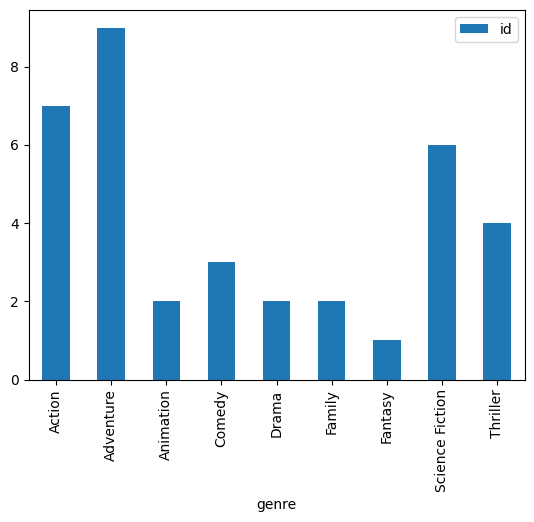

In [136]:
# Plot a bar chart of the genre_count
genre_count.plot(kind='bar')
plt.show()

## Merge a table to itself – Movie Sequel
#### <font color=red>So when would you ever need to merge a table to itself?</font> The table shown here is called sequels and has three columns. It contains a column for movie id, title, and sequel. The sequel number refers to the movie id that is a sequel to the original movie. 

#### For example, in the second row the movie is titled Toy Story, and has an id equal to 862. The sequel number of this row is 863. This is the movie id for Toy Story 2, the sequel to Toy Story. 

#### If we continue, 10193 is the movie id Toy Story 3 which is the sequel for Toy Story 2.

#### <font color=red>sequel table can be loaded from sequels.p </font>


In [137]:
sequels = pd.read_pickle('sequels.p')
sequels.head()

,id,title,sequel
0,19995,Avatar,<NA>
1,862,Toy Story,863
2,863,Toy Story 2,10193
3,597,Titanic,<NA>
4,24428,The Avengers,<NA>


#### To complete this merge, we set the sequels table as input to the merge method for both the left and right tables. We can think of it as merging two copies of the same table. All of the aspects we have reviewed regarding merging two tables still apply here. Therefore, we can merge the tables on different columns. 

#### <font color=blue>We'll use the 'left_on' and 'right_on' attributes to match rows where the sequel's id matches the original movie's id</font>. Finally, setting the suffixes argument in the merge method allows us to identify which columns describe the original movie and which describe the sequel. 

#### When we look at the results of the merge, the 'title_org' and 'title_seq' list the original and sequel movies, respectively. Here we listed the original movie and its sequel in one row.


### PAGE 31

## Merging a table to itself

In [138]:
original_sequels = sequels.merge(sequels, left_on = 'sequel', right_on = 'id', suffixes = ('_org','_seq'))
original_sequels.head()

,id_org,title_org,sequel_org,id_seq,title_seq,sequel_seq
0,862,Toy Story,863,863,Toy Story 2,10193
1,863,Toy Story 2,10193,10193,Toy Story 3,<NA>
2,675,Harry Potter and the Order of the Phoenix,767,767,Harry Potter and the Half-Blood Prince,<NA>
3,121,The Lord of the Rings: The Two Towers,122,122,The Lord of the Rings: The Return of the King,<NA>
4,120,The Lord of the Rings: The Fellowship of the Ring,121,121,The Lord of the Rings: The Two Towers,122


In [139]:
original_sequels[['title_org','title_seq']].head()

,title_org,title_seq
0,Toy Story,Toy Story 2
1,Toy Story 2,Toy Story 3
2,Harry Potter and the Order of the Phoenix,Harry Potter and the Half-Blood Prince
3,The Lord of the Rings: The Two Towers,The Lord of the Rings: The Return of the King
4,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Two Towers


## When to merge at table to itself
### Common solutions:
- Hierachical relationship
- Sequential relationship
- Graph data
#### When merging a table to itself, we can use the different types of joins we have already reviewed. Let's take the same merge from earlier but make it a left join. The 'how' argument is set in the merge method to left from the default 'inner’. 

#### Now the resulting table will show all of our original movie info. If the sequel movie exists in the table, it will fill out the rest of the row. If you compare this to our earlier merger, you now see movies like Avatar and Titanic in the result set.


## Merging a table to itself with left join  


In [140]:
original_sequels = sequels.merge(sequels, left_on = 'sequel', right_on = 'id',
                                 how='left', suffixes = ('_org','_seq'))
original_sequels.head()

,id_org,title_org,sequel_org,id_seq,title_seq,sequel_seq
0,19995,Avatar,<NA>,<NA>,NaN,<NA>
1,862,Toy Story,863,863,Toy Story 2,10193
2,863,Toy Story 2,10193,10193,Toy Story 3,<NA>
3,597,Titanic,<NA>,<NA>,NaN,<NA>
4,24428,The Avengers,<NA>,<NA>,NaN,<NA>


<div class="alert alert-block alert-info">
<h1> Page 35 </h1>
<h3>  Let’s Practice – Self Join</h3>
<h4> Merging a table to itself can be useful when you want to compare values in a column to other values in the same column. In this exercise, you will practice this by creating a table that for each movie will list the movie director and a member of the crew on one row. You have been given a table called crews, which has columns id, job, and name. </h4>

<h4> First, merge the table to itself using the movie ID. This merge will give you a larger table where for each movie, every job is matched against each other. Then select only those rows with a director in the left table, and avoid having a row where the director's job is listed in both the left and right tables. This filtering will remove job combinations that aren't with the director.</h4>

<h4> <font color=red>The crews table can be loaded from crews.p.</font> </h4>
</div>


In [141]:
crews = pd.read_pickle('crews.p')

d:\Jupyter_Conda\Lib\site-packages\pandas\compat\pickle_compat.py:35: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  stack[-1] = func(*args)
d:\Jupyter_Conda\Lib\site-packages\pandas\compat\pickle_compat.py:35: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  stack[-1] = func(*args)
d:\Jupyter_Conda\Lib\site-packages\pandas\compat\pickle_compat.py:35: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  stack[-1] = func(*args)


<div class="alert alert-block alert-info">
<h3> 10 Complete the following tasks.</h3>h3>
<h4> To a variable called crews_self_merged, merge the crews table to itself on the id column using an inner join, setting the suffixes to '_dir' and '_crew' for the left and right tables respectively.</h4>
</div>


In [142]:
# Merge the crews table to itself
crews_self_merged = crews.merge(crews, how = 'left', on = 'id', suffixes =('_dir','_crew'))

<div class="alert alert-block alert-info">
<h4> Create a Boolean, named boolean_filter, that selects rows from the left table with the job of 'Director' and avoids rows with the job of 'Director' in the right table.</h4>
<h4><i>boolean_filter = ((crews_self_merged['job_dir'] == 'Director') &</i></h4>
<h4>                           <i>(crews_self_merged['job_crew'] != 'Director'))</i></h4>
</div>

In [143]:
# Create a Boolean index to select the appropriate
boolean_filter = ((crews_self_merged['job_dir'] == 'Director') & 
     (crews_self_merged['job_crew'] != 'Director'))

<div class="alert alert-block alert-info">
<h4> Apply the filter to crews_self_merged and save the results to direct_crews.</h4>
</div>

In [144]:
direct_crews = crews_self_merged[boolean_filter]

<div class="alert alert-block alert-info">
<h4> Use the .head() method to print the first few rows of direct_crews.</h4>
</div>

In [145]:
# Print the first few rows of direct_crews
direct_crews.head()

,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
156,19995,Directing,Director,James Cameron,Editing,Editor,Stephen E. Rivkin
157,19995,Directing,Director,James Cameron,Sound,Sound Designer,Christopher Boyes
158,19995,Directing,Director,James Cameron,Production,Casting,Mali Finn
160,19995,Directing,Director,James Cameron,Writing,Writer,James Cameron
161,19995,Directing,Director,James Cameron,Art,Set Designer,Richard F. Mays


# PAge 37
## Concatenate two tables vertically
#### - pandas .concate() method can concatenate both vertical and horizontal.
#### ----> axis=0 , vertical
##  Basic concatenation
#### - 3 different tables
#### - same column names
#### - Table variable names 
#### --- inv_jan ( top )
#### --- inv_feb ( middle )
#### --- inv_mar ( bottom )
#### We can pass a list of table names into pd.concat() to combine the tables in the order they're passed in. To concatenate vertically, the <font color=red>axis argument should be set to 0</font>, but 0 is the default, so we don't need to explicitly write this. The result is a vertically combined table. Notice each table's index value was retained. 

# Page 38
### Concatenate
####  *pd.concat([inv_jan,inv_feb,inv_mar])*


In [146]:
inv_jul = pd.read_csv("inv_jul.csv")
inv_aug = pd.read_csv("inv_aug.csv")
inv_sep = pd.read_csv("inv_sep.csv")
print (inv_jul.shape,inv_aug.shape,inv_sep.shape)
inv_3months = pd.concat([inv_jul, inv_aug,inv_sep])
print (inv_3months.shape)
print (inv_3months.head(50))

(35, 5) (35, 5) (33, 5)
(103, 5)
    iid  cid invoice_date  total       bill_ctry
0    42   51     6/7/2009   1.98          Sweden
1    43   53     6/7/2009   1.98              UK
2    44   55     7/7/2009   3.96       Australia
3    45   59     8/7/2009   5.94           India
4    46    6    11/7/2009   8.91  Czech Republic
5    47   15    16/7/2009  13.86          Canada
6    48   29    24/7/2009   0.99          Canada
7   126   35    13/7/2010   1.98        Portugal
8   127   37    13/7/2010   1.98         Germany
9   128   39    14/7/2010   3.96          France
10  129   43    15/7/2010   5.94          France
11  130   49    18/7/2010   8.91          Poland
12  131   58    23/7/2010  13.86           India
13  132   13    31/7/2010   0.99          Brazil
14  209   18     7/7/2011   0.99             USA
15  210   19    20/7/2011   1.98             USA
16  211   21    20/7/2011   1.98             USA
17  212   23    21/7/2011   3.96             USA
18  213   27    22/7/2011   5.94    

### Concatenate Ignoring the index
####  *pd.concat([inv_jan,inv_feb,inv_mar], ignore_index=True)*


In [147]:
inv_3months = pd.concat([inv_jul, inv_aug,inv_sep], ignore_index=True)
print (inv_3months.head(50))

    iid  cid invoice_date  total       bill_ctry
0    42   51     6/7/2009   1.98          Sweden
1    43   53     6/7/2009   1.98              UK
2    44   55     7/7/2009   3.96       Australia
3    45   59     8/7/2009   5.94           India
4    46    6    11/7/2009   8.91  Czech Republic
5    47   15    16/7/2009  13.86          Canada
6    48   29    24/7/2009   0.99          Canada
7   126   35    13/7/2010   1.98        Portugal
8   127   37    13/7/2010   1.98         Germany
9   128   39    14/7/2010   3.96          France
10  129   43    15/7/2010   5.94          France
11  130   49    18/7/2010   8.91          Poland
12  131   58    23/7/2010  13.86           India
13  132   13    31/7/2010   0.99          Brazil
14  209   18     7/7/2011   0.99             USA
15  210   19    20/7/2011   1.98             USA
16  211   21    20/7/2011   1.98             USA
17  212   23    21/7/2011   3.96             USA
18  213   27    22/7/2011   5.94             USA
19  214   33    25/7

### Set Labels to Original Labels
#### Now, suppose we wanted to associate specific keys with each of the pieces of our three original tables. We can provide a list of labels to the keys argument. <font color=red>Make sure that ignore_index argument is False, since you can't add a key and ignore the index at the same time</font>. This results in a table with a multi-index, with the label on the first level.


### Setting labels to original tables
####  *pd.concate([inv_jan,inv_feb,inv_mar], ignore_index=False, keys=['jan','feb','mar'] )*


inv_3months = pd.concat([inv_jul, inv_aug,inv_sep], ignore_index=False, keys=['jul','aug','sep'])
print (inv_3months.head(50))

## Concatenate with Different Columns
#### <font color=blue>The concat method by default will include all of the columns in the different tables it's combining</font>. <font color=red>The sort argument, if true, will alphabetically sort the different column names in the result</font>. We can see in the results that the billing country for January invoices is NaN. However, there are values for the February invoices.


In [148]:
inv_sort = pd.concat([inv_jul, inv_aug ], sort=True)
 

<div class="alert alert-block alert-info">
<h1> Page 42 </h1>
<h1> Let’s Practice</h1>
<h4> You have been given a few tables of data with musical track info for different albums from the metal band, Metallica. The track info comes from their Ride The Lightning, Master Of Puppets, and St. Anger albums. </h4>

<h4> Try various features of the .concat() method by concatenating the tables vertically together in different ways.</h4>

<h4> <font color=blue>Load tracks_master, tracks_ride and tracks_st from tracks_master.csv, tracks_ride.csv and tracks_s.csv, respectively</font></h4>



In [149]:
#Concatenation basics
tracks_master = pd.read_csv('tracks_master.csv')
#print(tracks_master)
tracks_ride = pd.read_csv('tracks_ride.csv')
#print(tracks_ride)
tracks_st = pd.read_csv('tracks_st.csv')
#print(tracks_st)

<div class="alert alert-block alert-info">
<h3> 11. Complete the following tasks.</h3>
<h4> - Concatenate tracks_master, tracks_ride, and tracks_st, in that order, setting sort to True</h4>
</div>

In [150]:
# Concatenate the tracks
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st],
                               sort=True)
print(tracks_from_albums)

   aid             composer  gid  mtid                     name   tid  u_price
0  152  J.Hetfield/L.Ulrich    3     1                  Battery  1853     0.99
1  152            K.Hammett    3     1        Master Of Puppets  1854     0.99
2  152  J.Hetfield/L.Ulrich    3     1        Disposable Heroes  1857     0.99
0  154                  NaN    3     1     Fight Fire With Fire  1874     0.99
1  154                  NaN    3     1       Ride The Lightning  1875     0.99
2  154                  NaN    3     1  For Whom The Bell Tolls  1876     0.99
3  154                  NaN    3     1            Fade To Black  1877     0.99
4  154                  NaN    3     1        Trapped Under Ice  1878     0.99
0  155                  NaN    3     1                  Frantic  1882     0.99
1  155                  NaN    3     1                St. Anger  1883     0.99
2  155                  NaN    3     1     Some Kind Of Monster  1884     0.99
3  155                  NaN    3     1             D

<div class="alert alert-block alert-info">
<h4>- Concatenate tracks_master, tracks_ride, and tracks_st, where the index goes from 0 to n-1.</h4>
</div>

In [151]:
# Concatenate the tracks so the index goes from 0 to n-1
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st],
                               ignore_index=True,
                               sort=True)
print(tracks_from_albums)

    aid             composer  gid  mtid                     name   tid  \
0   152  J.Hetfield/L.Ulrich    3     1                  Battery  1853   
1   152            K.Hammett    3     1        Master Of Puppets  1854   
2   152  J.Hetfield/L.Ulrich    3     1        Disposable Heroes  1857   
3   154                  NaN    3     1     Fight Fire With Fire  1874   
4   154                  NaN    3     1       Ride The Lightning  1875   
5   154                  NaN    3     1  For Whom The Bell Tolls  1876   
6   154                  NaN    3     1            Fade To Black  1877   
7   154                  NaN    3     1        Trapped Under Ice  1878   
8   155                  NaN    3     1                  Frantic  1882   
9   155                  NaN    3     1                St. Anger  1883   
10  155                  NaN    3     1     Some Kind Of Monster  1884   
11  155                  NaN    3     1             Dirty Window  1885   
12  155                  NaN    3     

<div class="alert alert-block alert-info">
<h4> - Concatenate tracks_master, tracks_ride, and tracks_st, showing only columns that are in all tables.</h4>
</div>

In [152]:
# Concatenate the tracks, show only columns names that are in all tables
tracks_from_albums = pd.concat([tracks_master,tracks_ride, tracks_st],
                               join  = 'inner',
                               sort=True)
print(tracks_from_albums)

   aid  gid  mtid                     name   tid  u_price
0  152    3     1                  Battery  1853     0.99
1  152    3     1        Master Of Puppets  1854     0.99
2  152    3     1        Disposable Heroes  1857     0.99
0  154    3     1     Fight Fire With Fire  1874     0.99
1  154    3     1       Ride The Lightning  1875     0.99
2  154    3     1  For Whom The Bell Tolls  1876     0.99
3  154    3     1            Fade To Black  1877     0.99
4  154    3     1        Trapped Under Ice  1878     0.99
0  155    3     1                  Frantic  1882     0.99
1  155    3     1                St. Anger  1883     0.99
2  155    3     1     Some Kind Of Monster  1884     0.99
3  155    3     1             Dirty Window  1885     0.99
4  155    3     1            Invisible Kid  1886     0.99


<div class="alert alert-block alert-info">
<h1> Page 43</h1>
<h1> Let’s Practice – Concatenating with Keys</h1>
<h4> The leadership of the music streaming company has come to you and asked you for assistance in analyzing sales for a recent business quarter. They would like to know which month in the quarter saw the highest average invoice total. You have been given three tables with invoice data named inv_jul, inv_aug, and inv_sep. </h4>
<h4> Concatenate these tables into one to create a graph of the average monthly invoice total.</h4>
</div>


In [153]:
inv_jul = pd.read_csv('inv_jul.csv')
inv_aug = pd.read_csv('inv_aug.csv')
inv_sep = pd.read_csv('inv_sep.csv')

<div class="alert alert-block alert-info">
<h3> 12. Complete the following tasks.</h3>
<h4> - Concatenate the three tables together vertically in order with the oldest month first, adding '7Jul', '8Aug', and '9Sep' as keys for their respective months, and save to variable avg_inv_by_month.</h4>
</div>

In [154]:
# Concatenate the tables and add keys 

<div class="alert alert-block alert-info">
<h4> - Use the .agg() method to find the average of the total column from the grouped invoices (grouped by the above index keys, you can use attribute level = 0 in .groupby() method).</h4>
</div>

In [155]:
# Group the invoices by the index keys and find avg of the total column 

<div class="alert alert-block alert-info">
<h4> - Create a bar chart of avg_inv_by_month. </h4>
</div>

In [156]:
# Bar plot of avg_inv_by_month


## merge_ordered() in Pandas
#### The merge_ordered method will allow us to merge the left and right tables shown here. We can see the output of the merge when we merge on the "C" column. <font color=blue>The results are similar to the standard merge method with an outer join, but </font> the sorted results make this a useful method for ordered or time-series data.
# Page 44
### Method comparison
<table>
    <td> .merge() method: <br> <ul><li>Column(s) to join on <ul><li> on , left_on, right_on </li></ul></li> <li>Type of join <ul><li>how ( left,right, inner, outer )</li><li>default inner</li></ul> </li>
        <li>Overlapping column names <ul><li>suffixes</li></ul></li>
        <li>Calling the method <ul><li> df1.merge(df2)</li></ul></li>
    </ul></td>
    <td> .merge_ordered() method:<br><ul><li>Column(s) to join on <ul><li> on , left_on, right_on </li></ul></li>
        <li>Type of join <ul><li>how ( left,right, inner, outer )</li><li>default outer</li></ul> </li>
        <li>Overlapping column names <ul><li>suffixes</li></ul></li>
        <li>Calling the method <ul><li> pd.merge_ordered(df1,df2)</li></ul></li>
    </ul></td>
</table>

# Page 45
### Stock Data

### Filling missing values with forward fill.
### When to use merge_ordered() ?
### - Ordered data / time series
### - Filling in missing values 

#### *pd.merge_ordered(appl, mcd, on='date', suffixes=('_appl','_mcd'), fill_method='ffill')*


<div class="alert alert-block alert-info">
<h1> Page 46 </h1>
<h1> Let’s Practice - Correlation between GDP and S&P500 </h1>
</div>

<div class="alert alert-block alert-info">
<h4> In this exercise, you want to analyze stock returns from the S&P 500. You believe there may be a relationship between the returns of the S&P 500 and the GDP of the US. Merge the different datasets together to compute the correlation.</h4>

<h4> Two tables, named sp500, and gdp, can be loaded from S&P500.csv and GDP.csv, respectively.</h4>
</div>


In [157]:
gdp = pd.read_csv('GDP.csv', index_col = 0)
sp500 = pd.read_csv('S&P500.csv')

<div class="alert alert-block alert-info">
<h3> 13. Complete the following tasks.</h3>
</div>

<div class="alert alert-block alert-info">
<h4> Step1. </h4>
<h4> Use merge_ordered() to merge gdp and sp500 using a left join on year and date. Save the results as gdp_sp500.</h4>
<h4> Print gdp_sp500 and look at the returns for the year 2018.</h4>
</div>

In [158]:
# Use merge_ordered() to merge gdp and sp500 on year and date
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on= 'year', right_on= 'date', 
                             how='left')

# Print gdp_sp500
print(gdp_sp500)


  country code  year           gdp    date  returns
0          USA  2010  1.500000e+13  2010.0    12.78
1          USA  2011  1.550000e+13  2011.0     0.00
2          USA  2012  1.620000e+13  2012.0    13.41
3          USA  2012  1.620000e+13  2012.0    13.41
4          USA  2013  1.680000e+13  2013.0    29.60
5          USA  2014  1.750000e+13  2014.0    11.39
6          USA  2015  1.820000e+13  2015.0    -0.73
7          USA  2016  1.870000e+13  2016.0     9.54
8          USA  2017  1.950000e+13  2017.0    19.42
9          USA  2018  2.050000e+13     NaN      NaN


<div class="alert alert-block alert-info">
<h4> Step 2 </h4>
<h4> Use merge_ordered(), again similar to before, to merge gdp and sp500 use the function's ability to interpolate missing data to forward fill the missing value for returns, assigning this table to the variable gdp_sp500.</h4>
</div>


In [159]:
# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(gdp, sp500,left_on='year', right_on='date', how = 'left', fill_method = 'ffill')
# Print gdp_sp500
print (gdp_sp500)

  country code  year           gdp  date  returns
0          USA  2010  1.500000e+13  2010    12.78
1          USA  2011  1.550000e+13  2011     0.00
2          USA  2012  1.620000e+13  2012    13.41
3          USA  2012  1.620000e+13  2012    13.41
4          USA  2013  1.680000e+13  2013    29.60
5          USA  2014  1.750000e+13  2014    11.39
6          USA  2015  1.820000e+13  2015    -0.73
7          USA  2016  1.870000e+13  2016     9.54
8          USA  2017  1.950000e+13  2017    19.42
9          USA  2018  2.050000e+13  2017    19.42


<div class="alert alert-block alert-info">
<h4> Step 3 </h4>
<h4> Subset the gdp_sp500 table, select the gdp and returns columns, and save as gdp_returns.</h4>
</div>

In [160]:
# Subset the gdp and returns columns
gdp_returns = gdp_sp500[['gdp', 'returns']]



<div class="alert alert-block alert-info">
<h4> Print the correlation matrix of the gdp_returns table using the .corr() method.</h4>
</div>

In [161]:
# Print gdp_returns correlation
print (gdp_returns.corr())

              gdp   returns
gdp      1.000000  0.220321
returns  0.220321  1.000000


<div class="alert alert-block alert-info">
<h1> Page 48 </h1>
<h3> Phillips curve using merge_ordered()</h3>
<h4> There is an economic theory developed by A. W. Phillips which states that <font color=red>inflation and unemployment have an inverse relationship. The theory claims that with economic growth comes inflation, which in turn should lead to more jobs and less unemployment</font>.</h4>

<h4> You will take two tables of data from the U.S. Bureau of Labor Statistics, containing unemployment and inflation data over different periods, and create a Phillips curve. The tables have different frequencies. One table has a data entry every six months, while the other has a data entry every month. You will need to use the entries where you have data within both tables.</h4>

<h4>The tables unemployment and inflation can be loaded from <font color=blue>unemployment.csv</font> and <font color=blue>inflation.csv</font>, respectively</h4>
</div>


In [162]:
unemployment = pd.read_csv('unemployment.csv')
inflation = pd.read_csv('inflation.csv')


<div class="alert alert-block alert-info">
<h3> 14. Complete the following tasks.</h3>
<h4> Use merge_ordered() to merge the inflation and unemployment tables on date with an inner join, and save the results as inflation_unemploy.</h4>
</div>


In [163]:
# Use merge_ordered() to merge inflation, unemployment with inner join 

<div class="alert alert-block alert-info">
<h4> Print the inflation_unemploy variable.</h4>
</div>


In [164]:
# Print inflation_unemploy  

<div class="alert alert-block alert-info">
<h4> Using inflation_unemploy, create a scatter plot with unemployment_rate on the horizontal axis and cpi (inflation) on the vertical axis.</h4>
</div>


In [165]:
# Plot a scatter plot of unemployment_rate vs cpi of inflation_unemploy 

<div class="alert alert-block alert-info">
<h4> Find correlation between unemployment_rate and cpi.</h4>
</div>
